# LOL

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Modeling

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from colorama import Fore
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [13]:
df = pd.read_csv('./after_EDA.csv')

In [14]:
df

,blueWins,blueKills,blueDeaths,blueAvgLevel,blueTotalExperience,blueGoldDiff,blueExperienceDiff,blueGoldPerMin,redTotalGold,redAvgLevel,redTotalExperience
0,0,9,6,6.6,17039,643,-8,1721.0,16567,6.8,17047
1,0,5,5,6.6,16265,-2908,-1173,1471.2,17620,6.8,17438
2,0,7,11,6.4,16221,-1172,-1033,1611.3,17285,6.8,17254
3,0,4,5,7.0,17954,-1321,-7,1515.7,16478,7.0,17961
4,0,6,6,7.0,18543,-1004,230,1640.0,17404,7.0,18313
...,...,...,...,...,...,...,...,...,...,...,...
9874,1,7,4,7.2,18967,2519,2469,1776.5,15246,6.8,16498
9875,1,6,4,7.2,19255,782,888,1623.8,15456,7.0,18367
9876,0,6,7,7.0,18032,-2416,-1877,1590.3,18319,7.4,19909
9877,0,2,3,6.6,17229,-839,-1085,1445.9,15298,7.2,18314


In [31]:
float_columns = df.columns.difference(['blueWins'])
sc = StandardScaler()
df[float_columns] = sc.fit_transform(df[float_columns])
X = df[float_columns]
Y = df['blueWins']

x_train, x_test, y_train, y_test = train_test_split(X, T, test_size=0.3, random_state=13725)
accuracy_list = []

## Logistic Regression
- **Activation Function**: Sigmoid Function
$ P = 1/(1+e^{-z})$
- **Loss Function**:

    1) **Cross-entropy is defined as:**  
$ \qquad H(p,q) = E_p[-\log q] = H(p) + D_{KL}(P||q) = -\sum\limits_xp(x)\log q(x) \\
\qquad \qquad \textbf{where,} \; \text{p and q are two distributions and using the definition of}\;\textbf{K-L divergence}. \\
\qquad \qquad \qquad \; \; H(p) \; \text{is the entropy of p}\\
\qquad \qquad \qquad \; \; -\sum\limits_{x\in X}p(x)\log p(x)$
    2) **Kullback-Leibler divergence**  
$ \qquad D_{KL}(P||Q) \; \text{is a type of statistical distance}: \\
\qquad \qquad \text{a measure of how one probability distribution P is different from a second, reference probability distribution Q}. \\
\qquad D_{KL}(P||Q) = \sum\limits_{x\in X}P(x)\log (\cfrac{P(x)}{Q(x)}).
\qquad \text{The K-L Divergence is nothing but the excess risk of the log loss and K-L differs from Cross-entropy by a constant factor.} \\
\qquad \text{One important thing to remember is that:} \\
\qquad \qquad \text{Usually minimize the log loss instead of the cross-entropy in logistic regression which is not perfectly OK but it is in practice}$
    3) **Logistic Loss**  
$ \qquad\text{if} \; p \in \{y,1-y\} \; \text{and} \; q \in \{\hat{y},1-\hat{y}\} \\
\qquad \qquad H(p,q) = -\sum\limits_x p_x\log q_x = -y \log \hat{y} - (1-y)\log(1-\hat{y})$

In [32]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)
print(classification_report(y_test, log_reg_pred))
print(Fore.GREEN + f"Accuracy of Logistic Regression is: {100*log_reg_acc:.2f}%")

              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1485
           1       0.73      0.72      0.72      1479

    accuracy                           0.72      2964
   macro avg       0.72      0.72      0.72      2964
weighted avg       0.72      0.72      0.72      2964

Accuracy of Logistic Regression is: 72.47%


<Figure size 432x288 with 0 Axes>

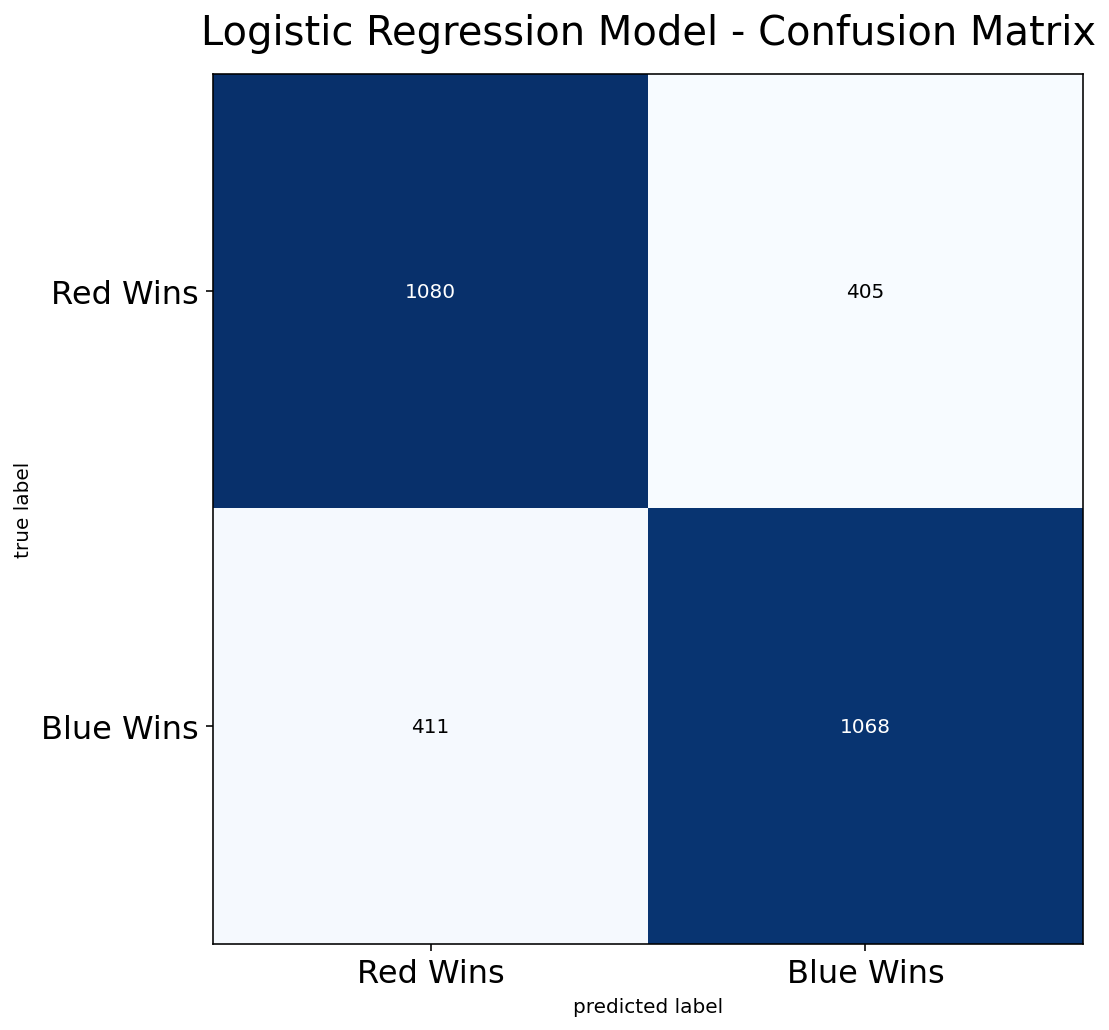

In [59]:
cm = confusion_matrix(y_test, log_reg_pred)
plt.figure()
plot_confusion_matrix(cm, figsize = (12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix", fontsize=20, y=1.02)
plt.xticks(range(2), ["Red Wins", "Blue Wins"], fontsize=16)
plt.yticks(range(2), ["Red Wins", "Blue Wins"], fontsize=16)
plt.show()

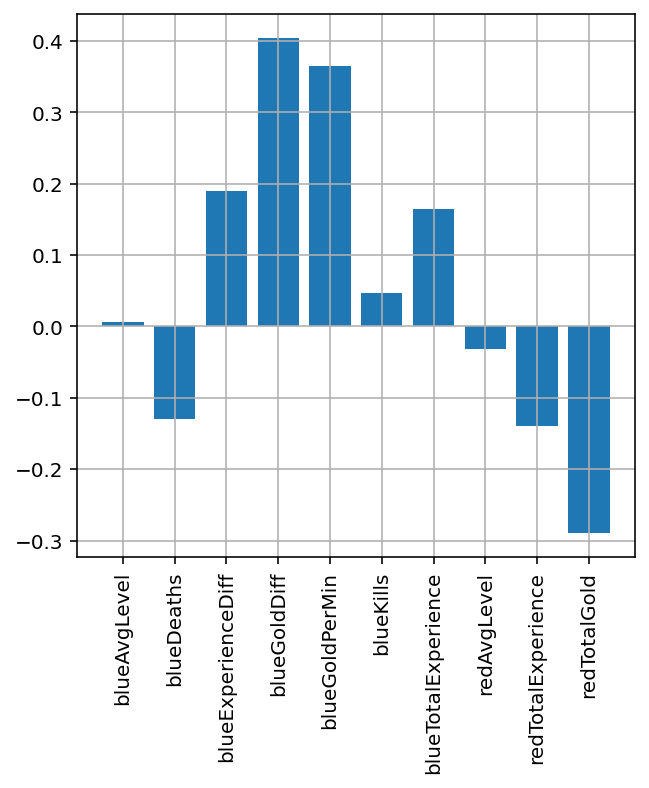

In [67]:
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(5, 5))
plt.bar(X.columns, log_reg.coef_[0,:])
plt.xticks(rotation=90)
plt.show()

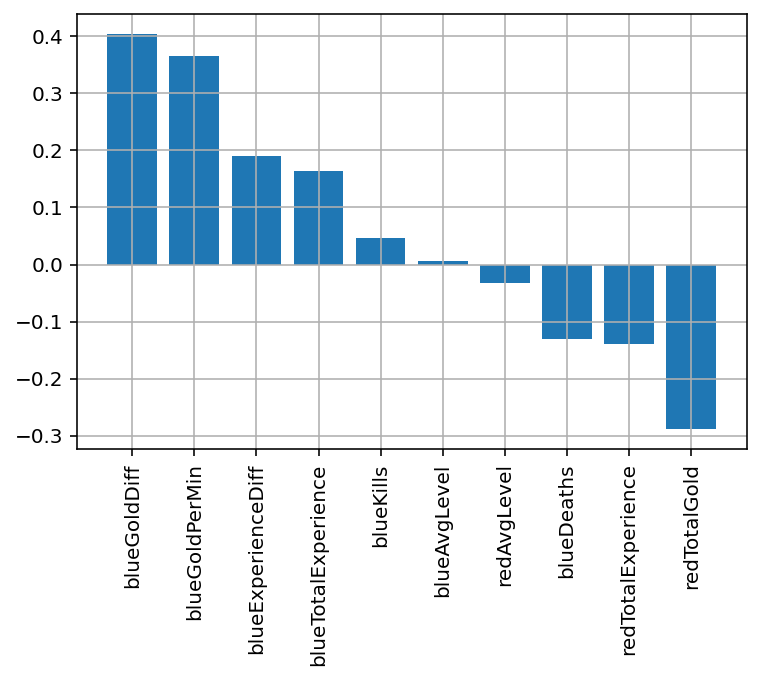

In [75]:
model_coef = pd.DataFrame(data=log_reg.coef_[0], index=X.columns, columns=['Model Coefficient'])
model_coef.sort_values(by='Model Coefficient', ascending=False, inplace=True)
plt.bar(model_coef.index, model_coef['Model Coefficient'])
plt.xticks(rotation=90)
plt.show()

In [33]:
from sklearn.svm import SVC
sv_clf = SVC()
sv_clf.fit(x_train, y_train)
sv_clf_pred = sv_clf.predict(x_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100*sv_clf_acc)
print(classification_report(y_test, sv_clf_pred))
print(Fore.GREEN + f"Accuracy of Support Vector Classifier is: {100*sv_clf_acc:.2f}%")

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1485
           1       0.72      0.71      0.72      1479

    accuracy                           0.72      2964
   macro avg       0.72      0.72      0.72      2964
weighted avg       0.72      0.72      0.72      2964

Accuracy of Support Vector Classifier is: 72.00%


In [34]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train, y_train, eval_metric='mlogloss')
xgb_clf_pred = xgb_clf.predict(x_test)
xgb_clf_acc = accuracy_score(y_test, xgb_clf_pred)
accuracy_list.append(100*xgb_clf_acc)
print(classification_report(y_test, xgb_clf_pred))
print(Fore.GREEN + f"Accuracy of XGBClassifier is: {100*xgb_clf_acc:.2f}%")

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      1485
           1       0.70      0.70      0.70      1479

    accuracy                           0.70      2964
   macro avg       0.70      0.70      0.70      2964
weighted avg       0.70      0.70      0.70      2964

Accuracy of XGBClassifier is: 70.31%


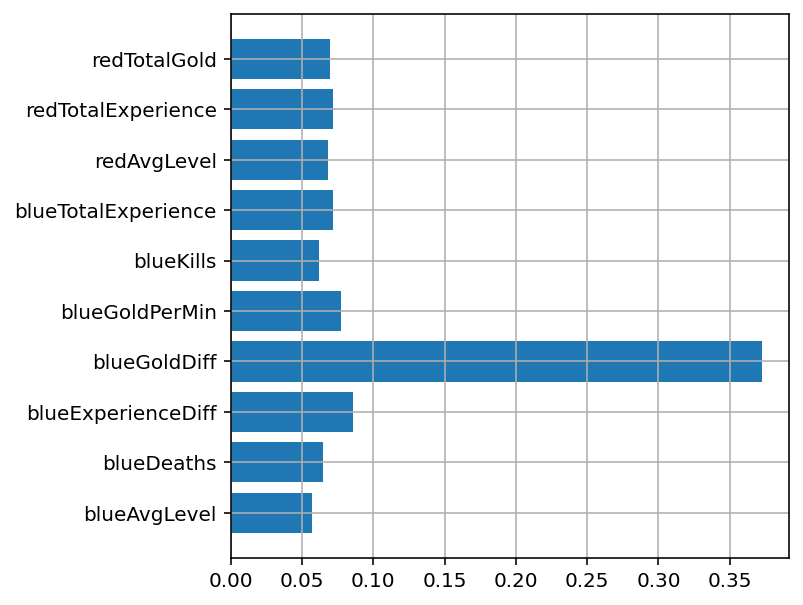

In [80]:
plt.figure(figsize=(5,5))
plt.barh(X.columns, xgb_clf.feature_importances_)
plt.show()